In [1]:
import numpy as np

In [2]:
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.6.0


In [3]:
from tensorflow import keras
print("Keras version", keras)

Keras version <module 'keras.api._v2.keras' from '/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/api/_v2/keras/__init__.py'>


In [4]:
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42) 
tf.random.set_seed(42)

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

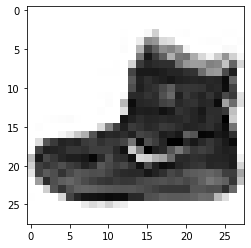

In [20]:
plt.imshow(X_train_full[0], cmap="Greys")

In [21]:
print ("item0", y_train_full[0])

item0 9


In [33]:
X_train = X_train_full[:55000]

In [34]:
y_train = y_train_full[:55000]

In [35]:
X_valid = X_train_full[55000:]

In [36]:
y_valid = y_train_full[55000:]

In [37]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


In [44]:
X_mean = X_train.mean(axis=0, keepdims=True)

In [45]:
X_std = X_train.std(axis=0, keepdims=True)

In [46]:
X_train = (X_train - X_mean) / X_std

In [47]:
X_valid = (X_valid - X_mean) / X_std

In [48]:
X_test = (X_test - X_mean) / X_std

In [49]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [50]:
print ("Shape of features", X_train.shape, X_valid.shape, X_test.shape)

Shape of features (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [58]:
from functools import partial

In [59]:
DefaultConv2D = partial(keras.layers.Conv2D,
                kernel_size=3, activation='relu', padding="SAME")

In [60]:
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]), 
    keras.layers.MaxPooling2D(pool_size=2), 
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [61]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [62]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 312s 180ms/step - loss: 0.7236 - accuracy: 0.7495 - val_loss: 0.3991 - val_accuracy: 0.8592
Epoch 2/3
1719/1719 [==============================] - 321s 187ms/step - loss: 0.4240 - accuracy: 0.8583 - val_loss: 0.3173 - val_accuracy: 0.8890
Epoch 3/3
1719/1719 [==============================] - 310s 180ms/step - loss: 0.3603 - accuracy: 0.8790 - val_loss: 0.2936 - val_accuracy: 0.8912


In [68]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 41ms/step - loss: 0.3217 - accuracy: 0.8864


In [69]:
print(results[1])

0.8863999843597412


In [70]:
X_new = X_test[10:20]

In [71]:
y_pred = model.predict(X_new)

In [72]:
print(np.argmax(y_pred, axis=1))

[4 5 7 3 4 1 2 4 8 0]


In [74]:
print (y_test[10:20])

[4 5 7 3 4 1 2 4 8 0]
